In [1]:
import pandas as pd
import pickle
import datetime

In [2]:
import sys
sys.path.insert(0, './utils/')

import ml_pipeline as mp

In [3]:
import importlib
importlib.reload(mp)

<module 'ml_pipeline' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\ml_pipeline.py'>

In [4]:
data_path = './data/loan.csv'

df = pd.read_csv(data_path)

C:\Users\xzhou\AppData\Local\Temp\ipykernel_19940\1420088683.py:3: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [5]:
df.shape

(887379, 74)

In [6]:
# Assign labels based on loan status

excluded = {'Issued', 'Does not meet the credit policy. Status:Charged Off',
            'Does not meet the credit policy. Status:Fully Paid'}
positive = {'Current', 'Fully Paid'}
negative = {'Charged Off', 'Default', 'In Grace Period', 
       'Late (16-30 days)', 'Late (31-120 days)'}

def assign_label(status):
    """
    Classify loan staus based on description
    """
    try: 
        status=status.strip()
        if status in positive:
            return "positive"
        elif status in negative:
            return "negative"
        else: 
            return "excluded"
    except: 
        return "excluded"

In [7]:
df['label'] = df['loan_status'].apply(lambda x: assign_label(x))

In [8]:
# Drop ids, and loan status to prevent info leakage
cols_to_drop = ['id', 'member_id', 'loan_status']
df_id_removal = df.drop(columns = cols_to_drop)

In [9]:
# Only keep loans with good or bad status
df_label = df_id_removal[df_id_removal['label']!='excluded']
df_label.label.unique()

array(['positive', 'negative'], dtype=object)

In [11]:
pipeline = mp.MLPipeline(df_label)

In [12]:
df_processed = pipeline.preprocess_data()

INFO:root:Label encoding: {'positive': 0, 'negative': 1}
INFO:root:Dropped columns with missing values above the threshold
INFO:root:Processed date columns
INFO:root:Handled missing values for numerical columns
INFO:root:Handled extreme values for numerical columns
INFO:root:Created dummy variables for categorical columns
INFO:root:Handled high correlation among numerical columns
INFO:root:Standardized numerical columns
INFO:root:Cleaned feature names for XGBoost


INFO:root:Starting feature selection...


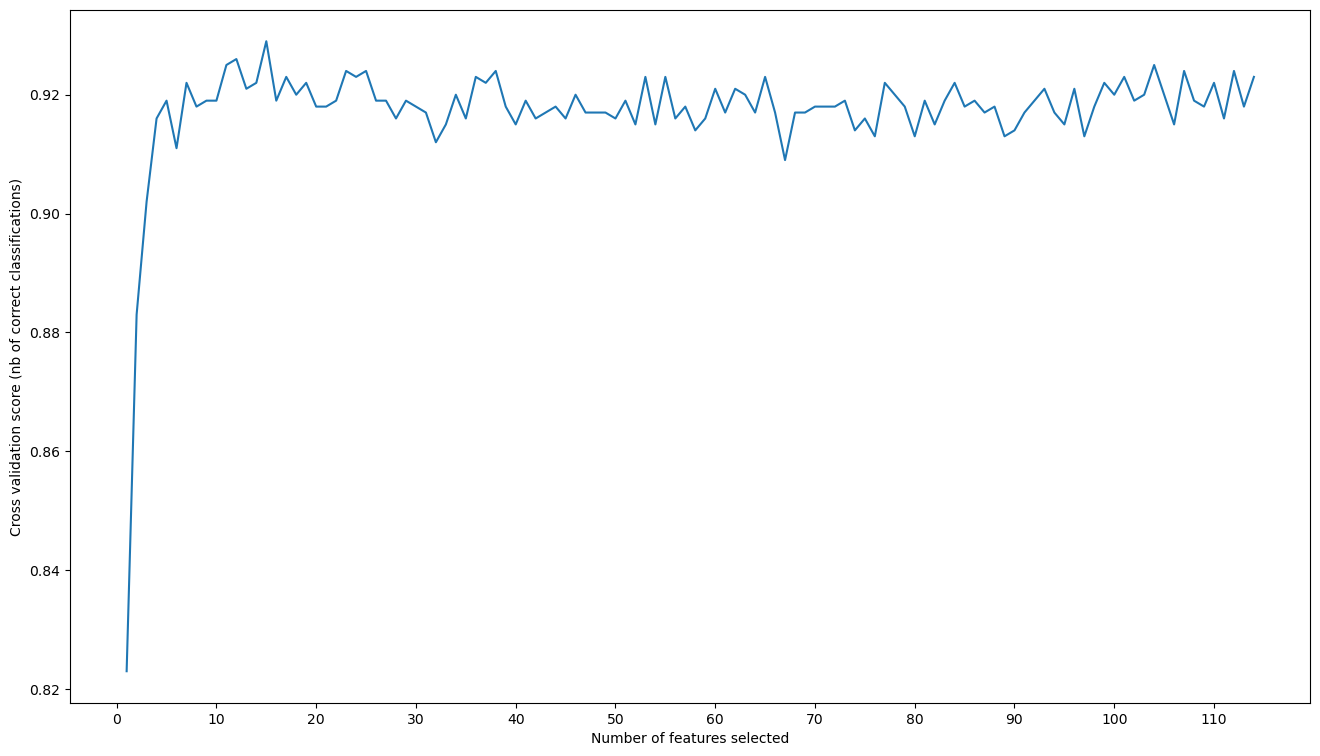

INFO:root:Feature selection completed in 8.90 seconds
INFO:root:Requested number of features (20) is greater than the optimal number of features (15).
INFO:root:Number of features selected: 20
INFO:root:Selected features : ['loan_amnt', 'int_rate', 'annual_inc', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'tot_cur_bal', 'total_rev_hi_lim', 'next_pymnt_d_Jan-2016', 'verification_status_Source Verified', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4']
INFO:root:Optimal number of features : 15
INFO:root:Optimal features selected : ['loan_amnt', 'annual_inc', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'total_rev_hi_lim', 'next_pymnt_d_Jan-2016', 'sub_grade_C2']


In [13]:
selected_features = pipeline.select_features(n_features_to_select=20, n_samples=1000)

C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Done (Execution Time: 5.72 seconds)
KNN: Done (Execution Time: 0.97 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM: Done (Execution Time: 3.46 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest: Done (Execution Time: 4.59 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost: Done (Execution Time: 3.55 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


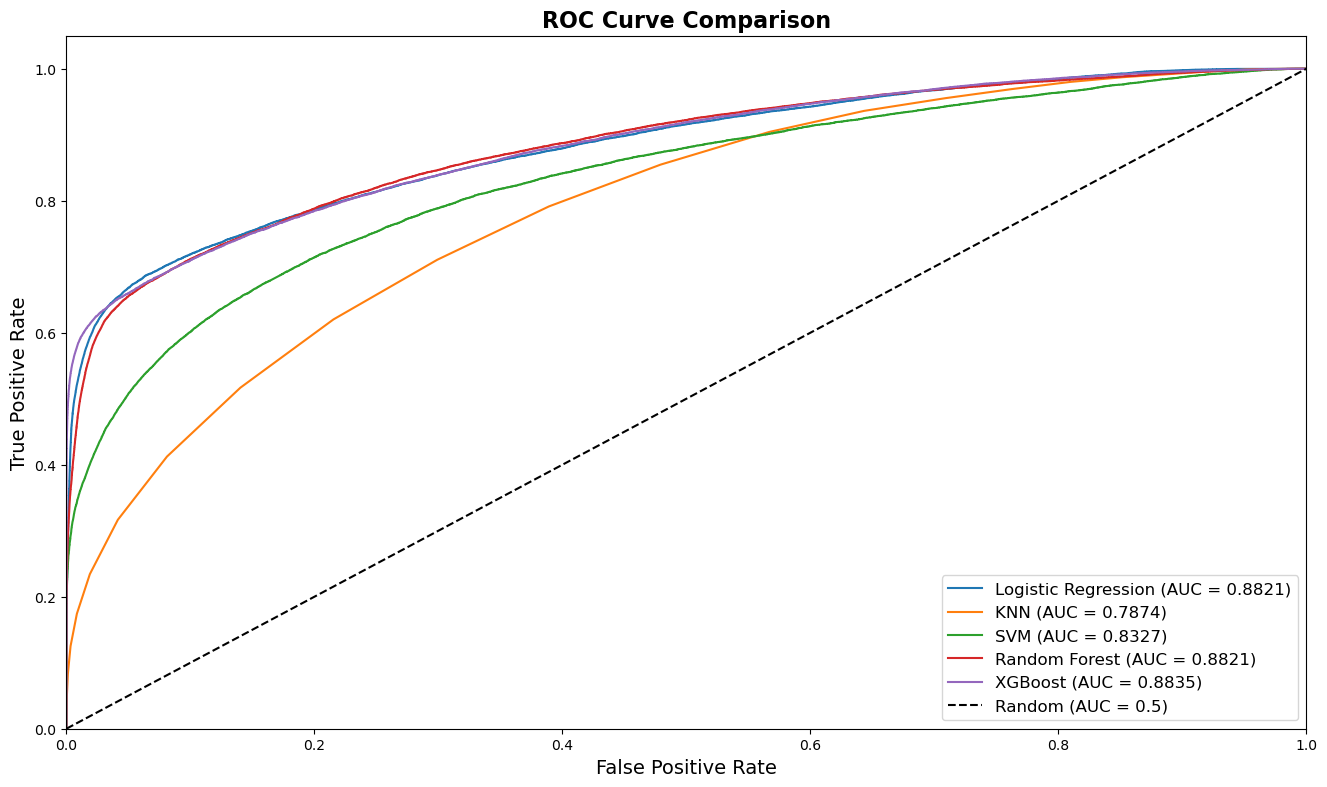

Model Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.898345   0.406283  0.706615  0.515924  0.882059
1                  KNN  0.624753   0.144471  0.791325  0.244334  0.787440
2                  SVM  0.796394   0.231046  0.711230  0.348787  0.832694
3        Random Forest  0.881952   0.362991  0.715101  0.481545  0.882132
4              XGBoost  0.892494   0.388655  0.702149  0.500354  0.883462

Best Performing Model:

Model        Logistic Regression
Accuracy                0.898345
Precision               0.406283
Recall                  0.706615
F1 Score                0.515924
ROC AUC                 0.882059
Name: 0, dtype: object

Best Hyperparameters for the Best Performing Model:

{'max_iter': 1000, 'C': 10}

Best Performing Model:

Model         XGBoost
Accuracy     0.892494
Precision    0.388655
Recall       0.702149
F1 Score     0.500354
ROC AUC      0.883462
Name: 4, dtype: object

Saved best model (X

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [14]:
pipeline.run_classification_models(n_samples=1000, search_type = 'random', scoring_metric='f1 score' )

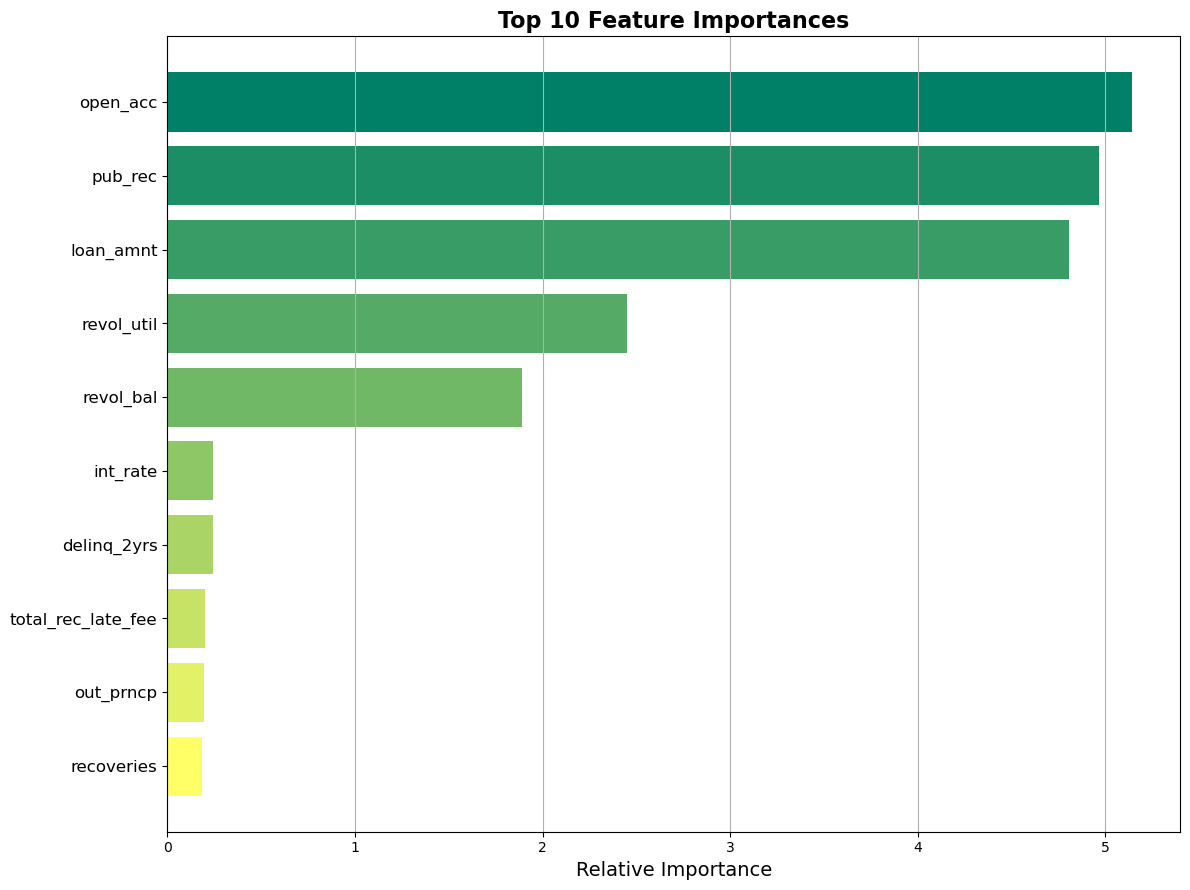

{'open_acc': 5.141494013113515,
 'pub_rec': 4.966580468480039,
 'loan_amnt': 4.805943196721258,
 'revol_util': 2.4485640482347204,
 'revol_bal': 1.8913188417808589,
 'int_rate': 0.244314072050933,
 'delinq_2yrs': 0.24280446103019826,
 'total_rec_late_fee': 0.19907099435139455,
 'out_prncp': 0.19398593290779076,
 'recoveries': 0.18490839947187965}

In [15]:
pipeline.plot_top_n_features()